# Exercise 2 {-}

**Let $Y \sim N(0,\Sigma)$ with $Y \in R^n$. Let $M$ be an invertible $n\times n$ matrix. Show that $MY \sim N(0,M\Sigma M^T)$. Don’t assume that $MY$ is normal.**

$$\mathbb{P}\{MY \in R\}$$

$$= \mathbb{P}\{Y \in M^{-1}R\}$$

$$= \iint\limits_{M^{-1}R} \ldots \int dy_1 dy_2 \ldots dy_n \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-y^T\Sigma^{-1}y/2} ~~~~~~~~~~~~ (*)$$

Now, consider the transformation $z=My \implies y=M^{-1}z$. 

Note that,

$$\frac{\partial y}{\partial z}$$

$$= \frac{\partial M^{-1}z}{\partial z}$$

$$=\frac{\partial}{\partial z}\begin{pmatrix}
\sum_{i=1}^{n}M_{1i}^{-1}z_i \\
\sum_{i=1}^{n}M_{2i}^{-1}z_i \\
\vdots \\ 
\sum_{i=1}^{n}M_{ni}^{-1}z_i
\end{pmatrix}$$

$$=\begin{pmatrix}
\frac{\partial (\sum_{i=1}^{n}M_{1i}^{-1}z_i)}{\partial z_1} & \frac{\partial (\sum_{i=1}^{n}M_{1i}^{-1}z_i)}{\partial z_2} & \ldots & \frac{\partial (\sum_{i=1}^{n}M_{1i}^{-1}z_i)}{\partial z_n} \\
\frac{\partial (\sum_{i=1}^{n}M_{2i}^{-1}z_i)}{\partial z_1} & \frac{\partial (\sum_{i=1}^{n}M_{2i}^{-1}z_i)}{\partial z_2} & \ldots & \frac{\partial (\sum_{i=1}^{n}M_{2i}^{-1}z_i)}{\partial z_n} \\
\vdots \\ 
\frac{\partial (\sum_{i=1}^{n}M_{ni}^{-1}z_i)}{\partial z_1} & \frac{\partial (\sum_{i=1}^{n}M_{ni}^{-1}z_i)}{\partial z_2} & \ldots & \frac{\partial (\sum_{i=1}^{n}M_{ni}^{-1}z_i)}{\partial z_n} \\
\end{pmatrix}$$

$$=M^{-1}.$$

And so, by applying the transformation $z=My$, we have that,

$$(*)=\iint\limits_{R} \ldots \int dz_1 dz_2 \ldots dz_n \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}|M^{-1}|e^{-(M^{-1}z)^T\Sigma^{-1}M^{-1}z/2}$$

$$=\iint\limits_{R} \ldots \int dz_1 dz_2 \ldots dz_n \frac{1}{(2\pi)^{n/2}(\frac{|\Sigma|}{|M^{-1}||M^{-1}|})^{1/2}}e^{-z^T(M^{-1})^T\Sigma^{-1}M^{-1}z/2}$$

$$=\iint\limits_{R} \ldots \int dz_1 dz_2 \ldots dz_n \frac{1}{(2\pi)^{n/2}(|M||\Sigma||M|)^{1/2}}e^{-z^T(M^T)^{-1}\Sigma^{-1}M^{-1}z/2}$$

since $\frac{1}{|M^{-1}|}=|M|$ and $(M^{-1})^T=(M^T)^{-1}$

$$=\iint\limits_{R} \ldots \int dz_1 dz_2 \ldots dz_n \frac{1}{(2\pi)^{n/2}(|M||\Sigma||M^T|)^{1/2}}e^{-z^T(M\Sigma M^T)^{-1}z/2}$$

since $|M|=|M^T|$

$$=\iint\limits_{R} \ldots \int dz_1 dz_2 \ldots dz_n \frac{1}{(2\pi)^{n/2}(|M\Sigma M^T|)^{1/2}}e^{-z^T(M\Sigma M^T)^{-1}z/2}$$

since the determinant of a product is the product of the determinants.

The last equation is the density of a multivariate normal with mean $0$ and covariance $M\Sigma M^T$. We are done. 

# Exercise 3 {-}

**Let $X$ be an exponential random variable with rate $1$. Using cdf inversion, write a function that generates $n$ independent samples of $X$. Compare the speed of your sampler for $n = 10^6$ with that of your language’s exponential sampler (in R rexp).**


The inverse transform method uses the fact that if $X$ is a variable with cdf $F_X(x)$, then $U=F_X(X)\sim Uniform(0, 1).$

To generate $n$ independent samples, $x_1, x_2, \ldots, x_n$, from a random variable $X$ with cdf $F_X(x)$ using the inverse transform method you would do the following: 

- Find the inverse of the cdf of $X$, $F^{-1}_X(x)$.
- For $i=1,2,\ldots, n$
    - Sample $u_i$ from $Uniform(0,1)$
    - Let $x_i=F^{-1}_X(u_i)$

Let's find $F^{-1}_X(x)$ for $X\sim Exp(1)$:

We know that $f_X(x)=e^{-x}$ for $x>0$ and $F_X(x)=\int_{0}^{x} e^{-t} dt = (e^{-t})|_{0}^{x} = 1 - e^{-x}.$

Now, 

$$y=F_X(x)=1-e^{-x}$$

$$e^{-x}=1-y$$

$$-x=\log(1-y)$$

$$x=-\log(1-y)$$

And so $F^{-1}_X(x)=-\log(1-x)$.

In [1]:
from numpy.random import uniform, random
import numpy as np

In [2]:
def exp_sampler(n):
    """Generates n independent samples of an exponential 
    random variable using the inverse transform method
    
    Args:
        n: number of independent samples
        
    Returns:
        An array of length n
    
    """
    
    def exp_inverse(x):
        return(-np.log(1-x))
    
    return(exp_inverse(uniform(0, 1, n)))   

Let's see how $exp$_$sampler$ performs for $n=10^6$.

In [3]:
n = 10**6

In [4]:
samples = exp_sampler(n)

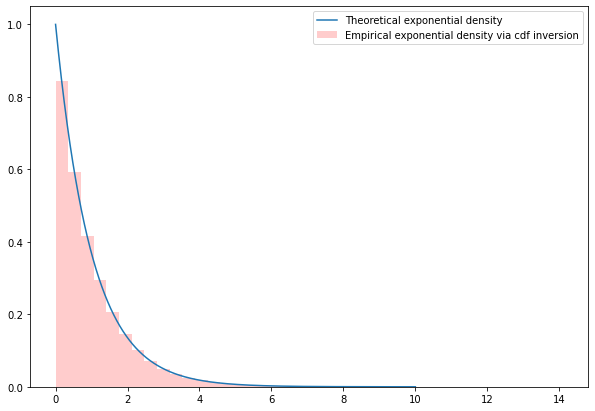

In [5]:
from scipy.stats import expon
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 5000)
y = expon.pdf(x=x, loc=0, scale=1)
plt.figure(figsize=(10, 7))
plt.plot(x, y, label="Theoretical exponential density")
plt.hist(samples, density=True, alpha=0.2, 
         color='red', bins=40,
         label="Empirical exponential density via cdf inversion")
plt.legend()
plt.show()

In [6]:
samples.mean()

1.0009095470963476

In [7]:
samples.var()

1.0029079219867696

As we can see above, the empirical and theoretical distributions look like they agree. The sample statistics, mean and variance, are also very close to the first moment and the second central moment.

Let's now compare the performance of $exp$_$sampler$ and python's exponential sampler in terms of speed.

In [8]:
from numpy.random import exponential

In [9]:
%time exp_sampler(n)

CPU times: user 51.8 ms, sys: 12.8 ms, total: 64.6 ms
Wall time: 62.9 ms


array([1.5950504 , 0.05153149, 0.63707467, ..., 0.03816482, 1.54859169,
       0.0051575 ])

In [10]:
%time exponential(scale=1, size=n)

CPU times: user 52 ms, sys: 3.81 ms, total: 55.8 ms
Wall time: 54.7 ms


array([1.84816885, 0.20162672, 0.99701121, ..., 0.03281265, 0.76854208,
       0.10100135])

As can be seen from above, $exp$_$sampler$ is slower than python's exponential sampler.

# Exercise 4 {-}

**Write a function MarkovChain(P, s0, s) that simulates a Markov chain $X(t)$ until the first time the chain is in state $s$, assuming $X(0) = s_0$. The function should return the path of the chain from $t = 0$ to when it ”hits” state $s$. You may use your language’s discrete sampler (in R sample) or write your own.**

The dynamics of a Markov Chain are determined by 

$$P(x,y) := \mathbb{P}\{X_{t+1}=y | X_t=x \}$$

for $x, y \in S$ with $S$ being the state space.

- $P(x, y)$ is the probability of going from state $x$ to state $y$ in one unit of time.
- $P(x, \cdot)$ is the conditional distribution of $X_{t+1}$ given $X_t=x$.

And so we can view $P$ as a matrix where $P_{ij}=P(x_i,x_j) ~~ 1\le i,j\le n$, assuming $|S|=n$.

So given a matrix $P$ we can simulate a Markov Chain $\{ X_t\}_{t=0}^{\infty}$ as:
- Either be given/assume $X_0$ or sample $X_0$ from a specified distribution
- For each $t=1,...$ sample $X_{t+1}$ from $P(X_t, \cdot)$

In [11]:
import numpy as np
from numpy.random import choice

In [12]:
def MarkovChain(P, s0, s):
    """Simulates a Marlov Chain X(t) until the first time the 
    chain is in state s
    
    Args:
        P: Transition probability matrix
        s0: Initial state of Markov Chain
        s: Desired state to be reached by Markov Chain
        
    Returns:
        List with path of Markov Chain until 
        it reaches state s, including state s
    
    """
    length = len(P)
    mc_path = [s0]
    while s0 != s:
        s0 = choice(np.arange(length), size=1, p=P[s0, ]).item()
        mc_path.append(s0)
    
    return(mc_path)    

# Exercise 5 {-}

**Chutes and Ladders is a popular children’s game. The board is shown in the image file attached to this assignment. One version of the rules are as follows:**

**A board contains squares labeled with the numbers $1,2,..,100.$ A player starts with her/his piece off the board and rolls the die so as to start on one of squares $1,2,3,4,5$ or $6$. During each subsequent turn, each player rolls a six-sided die and moves forward the corresponding number of squares. If after moving the piece forward according to the die roll, the piece is on a square with a ladder bottom, then that player must slide her/his piece up the ladder to the square it ends on. If the token lands on a square with a chute top, then that player must slide down to the square the chute ends on. The goal is to reach $100$ and the player is assumed to reach $100$ if the player’s piece goes past or lands on the $100$ square. So, for example, if the piece is on $99$ and the player roles a $5$ then the player wins. The game is played with two players who take turns until one of them wins.**

**Use your function from problem $4$ and a Monte Carlo approach to compute $E[L]$ where $L$ is the average length, in terms of the number of die rolls, of a Chutes and Ladders game. Use a CLT argument to determine roughly how many games you have to simulate to estimate $E[L]$ to an accuracy of $\pm 5$.**

If we let $X_t$ represent the square the player occupies at time $t$, we can model the above using a discrete time and discrete space Markov Chain. We have that $t \in \{0, 1, 2, 3, \ldots \}$ and that the state space, $S$, is $S=\{0, 1, 2, 3, 5, \dots, 100\}$. Note that $X_0 = 0$, i.e, the player starts with her/his piece off the board.

The transition probability matrix will be a $101 \times 101$ matrix. 

$^{(*)}$Considering $x \in S$: 

$P(X_t = k | X_{t-1} = x) = \frac{1}{6}$ for $k \in K = \{x+1, x+2, x+3, x+4, x+5, x+6\}$ and $0$ otherwise unless:

1. A member of $K$, say $i$, is also a member of the _chutes_and_ladder_locations.csv_ start column. If this is the case, once the player lands in $i$, she/he will be forced to go up/down the ladder/chute to the appropriate square, call it $j$. We will model this by letting $P(X_t = i | X_{t-1} = x) = 0$ and $P(X_t = j | X_{t-1} = x) = \frac{1}{6}$.


2. $X_{t-1} = i$  for $i \in \{95, 96, 97, 98, 99 \}$. In this case $P(X_t = 100 | X_{t-1} = i) > \frac{1}{6}$. For example, the conditional distribution $P(X_t = k | X_{t-1} = 96)$ is:

$$P(X_t = k | X_{t-1} = 96) = \begin{cases} 
      \frac{1}{6} & k \in \{ 78, 97, 99 \} \\
      1-3(\frac{1}{6}) =\frac{1}{2} & k = 100 \\
      0 & \text{otherwise}
\end{cases}
$$

Note that $P(X_t = 98 | X_{t-1} = 96) = 0$. There is a chute at square $98$ sliding the player down to square $78$ hence, $P(X_t = 98 | X_{t-1} = 96) = 0$ and $P(X_t = 78 | X_{t-1} = 96) = \frac{1}{6}$ in the conditional distribution above.

All the above is coded below in the function $build$_$P$.

$^{(*)}$ As a note, the $101^{\text{th}}$ row of the transition probability matrix, i.e., $P(X_t = k | X_{t-1} = 100)$ makes no sense in the context of the problem (you win when you reach the square number $100$). However, transition probability matrices are square and each row has to sum to $1$. As a consequence, I am letting the last entry of the $101^{\text{th}}$ row be equal to $1$. This essentially means that $P(X_t = k | X_{t-1} = 100)=1$ for $k = 100$ and $0$ otherwise. In other words, the player does not move (she/he can keep rolling the dice but will always remain at square number $100$). This does not affect part of our end-goal, which is to get the length of a Chutes and Ladders game (as once $X_t=100$ for some $t$, the game will stop), but makes sure our transition probability matrix is actually a transition probability matrix.

In [13]:
def build_P(chutes_and_ladder_locations):
    """Builds the transition probability matrix for the chutes and ladders game
    
    Args:
        chutes_and_ladder_locations: Dataframe containing the info from 
        the chutes_and_ladder_locations.csv
    
    Returns:
        A numpy array of shape (101, 101)
    
    """
    # helper function
    def shift(array):
        return(np.concatenate((np.array([0]), array[:-1])))
    
    # creating the transition probability 
    # matrix, P, assuming no chutes and ladders
    pdf = np.zeros(101)
    pdf[1:7] = 1/6
    P = pdf.copy()
    
    for _ in range(100):
        pdf = shift(pdf)
        P = np.concatenate((P, pdf))
  
    P = P.reshape(101, 101)
    
    # fixing P for (*) explained above
    P[100, 100] = 1
    
    # fixing P for point 1 explained above
    for i, j in zip(chutes_and_ladder_locations.start, chutes_and_ladder_locations.end):
        P[:,j] += P[:,i]
        P[:,i] = np.zeros(101)
    
    # fixing P for point 2 explained above
    for i in [95, 96, 97, 98, 99]:
        P[i, -1] = 1 - np.sum(P[i, :-1])
    
    return(P)

In [14]:
import pandas as pd
chutes_and_ladder_locations = pd.read_csv('chutes_and_ladder_locations.csv')
chutes_and_ladder_locations.head()

,start,end
0,1,38
1,4,14
2,9,31
3,21,42
4,28,84


In [15]:
P = build_P(chutes_and_ladder_locations)

Let's look at $P(X_t = k | X_{t-1} = 96)$ since we wrote down the conditional distribution above:

In [16]:
P[96,]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Let's also look at $P(X_t = k | X_{t-1} = 0)$:

In [17]:
P[0,]

array([0.        , 0.        , 0.16666667, 0.16666667, 0.        ,
       0.16666667, 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

The above looks good. Note there is a ladder at square $1$ leading to square $38$, hence $P(X_t = 1 | X_{t-1} = 0)=0$ and $P(X_t = 38 | X_{t-1} = 0)=\frac{1}{6}$, and a ladder at square $4$ leading to square $14$, hence $P(X_t = 4 | X_{t-1} = 0)=0$ and $P(X_t = 14 | X_{t-1} = 0)=\frac{1}{6}$.

We can also check that all rows of P sum to $1$.

In [18]:
np.sum(P, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
def chutes_and_ladders_game(P, s, return_path=False):
    """Returns the markov chain and length of the markov chain
    for a game of chutes and ladders
    
    Args:
        P: Transition probability matrix
        s: Desired state to be reached by markov chain
        return_path: flag that indicates if markov chain 
        path should be returned
    
    Returns:
        length of markov chain if return_path=False
        length of markov chain and markov chain path
        if return_path=True

    """
    length = len(P)
    s0 = choice(np.arange(length), size=1, p=P[0, ]).item()
    mc_path = MarkovChain(P, s0, s)
    
    if return_path == True:
        return mc_path, len(mc_path)
    return len(mc_path)

In [20]:
squares, length = chutes_and_ladders_game(P, 100, True)

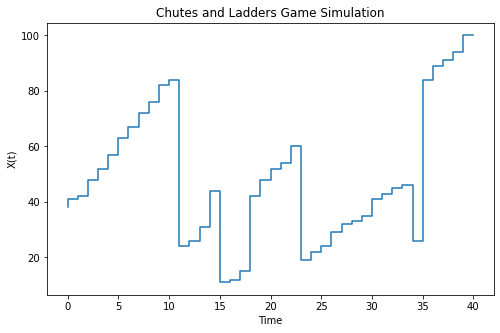

In [21]:
# Let's visualize the squares the player visits throughout the game
plt.figure(figsize=(8, 5)) 
plt.step(np.arange(length), squares) 
plt.title('Chutes and Ladders Game Simulation') 
plt.xlabel('Time') 
plt.ylabel('X(t)')
plt.show()

In [22]:
n = 10000
lengths = [chutes_and_ladders_game(P, 100) for _ in range(n)]

In [23]:
np.mean(lengths)

35.8141

Roughly, the average number of die rolls until the player wins is $36$.

Let $L$ be the length of a Chutes and Ladders game. We want to determine roughly how many games, $n$, to simulate to estimate $E[L]$ to an accuracy of $\pm 5.$ The distribution of $L$ is unkown.

Let $L^{(1)}, L^{(2)}, L^{(3)}, \ldots, L^{(n)}$ be iid r.v's with distribution equal to $L$. Denote $\bar{L}$ as the sample mean, i.e., $\bar{L} = \frac{1}{n}\sum_{i=1}^{n}L^{(i)}$ and $\sigma^2$ as the unknown variance of $L.$

We know that $E[\bar{L}]=E[L]$ and that the standard deviation of $\bar{L}$ is $\sigma/\sqrt{n}.$ We also know that an unbiased estimator for $\sigma$ is the sample standard deviation, denote it by $\hat{\sigma}=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(L^{(i)}-\bar{L})}$.

In [24]:
# Let's calculate the sample standard deviation
sigma_hat = np.sqrt(np.var(lengths, ddof=1))
sigma_hat

23.15571549112639

By the CLT we know that $\frac{\bar{L}-E[L]}{\sigma/\sqrt{n}}$ converges in distribution to a standard normal random variable. 
And so, for sufficiently large $n$, $\frac{\bar{L}-E[L]}{\hat{\sigma}/\sqrt{n}}$ is approximately distributed as a standard normal random variable.

We want,

$$\mathbb{P}\{ -5 \le \bar{L}-E[L] \le 5\}$$

$$=\mathbb{P}\{ -5(\frac{\sqrt n }{\hat{\sigma}}) \le (\frac{\sqrt n}{\hat{\sigma}})(\bar{L}-E[L]) \le 5(\frac{\sqrt n }{\hat{\sigma}})\}$$

$$=\mathbb{P}\{ -5(\frac{\sqrt n }{\hat{\sigma}}) \le  \frac{\bar{L}-E[L]}{\hat{\sigma}/ \sqrt n} \le 5(\frac{\sqrt n }{\hat{\sigma}})\}$$

If we want, 

$$\mathbb{P}\{ -5(\frac{\sqrt n }{\hat{\sigma}}) \le  \frac{\bar{L}-E[L]}{\hat{\sigma}/ \sqrt n} \le 5(\frac{\sqrt n }{\hat{\sigma}})\}=0.95$$

then 

$$5(\frac{\sqrt n }{\hat{\sigma}})=1.96$$

$$n = (\frac{1.96\hat{\sigma}}{5})^{2}$$

with $\hat{\sigma}$ calculated above. 

In [25]:
(1.96*sigma_hat/5)**2

82.39266373979413

And so, we would need to simulate 83 games to get within $\pm 5$ of $E[L].$

If, we wanted a higher percent confidence, say $99\%$, then 

$$\mathbb{P}\{ -5(\frac{\sqrt n }{\hat{\sigma}}) \le  \frac{\bar{L}-E[L]}{\hat{\sigma}/ \sqrt n} \le 5(\frac{\sqrt n }{\hat{\sigma}})\}=0.99$$

so that 

$$5(\frac{\sqrt n }{\hat{\sigma}}) \approx 2.57$$

$$n \approx (\frac{2.57\hat{\sigma}}{5})^{2}$$

In [26]:
(2.56*np.std(lengths)/5)**2

140.54419102171136

And we would need to simulate approx. $141$ games to get within $\pm 5$ of $E[L].$